In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro

In [4]:
%%html
<style>
.dataframe td {
    white-space: nowrap;
}
</style>

In [5]:
# PATH
PATH = 'Data/'

### Import Data & Processing
#### Columns
| Item information, Store information

In [6]:
# Columns
COLS_ITM = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']
COLS_DATE = ['d_' + str(i) for i in range(1, 366)]

#### Sales Data
| We will take only the training data set and filter the first year 

In [7]:
# Import
df = pd.read_csv('sales_train_evaluation.csv')
print("{:,} records for train data set".format(len(df)))
# Change id to match with price dataframe
df['id'] = df['store_id'] + '-' + df['item_id']
# Set index
df.set_index(COLS_ITM, inplace = True)
# Scope = Year 1
df = df[COLS_DATE]

df.head()

30,490 records for train data set


,,,,,,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_356,d_357,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365
id,item_id,dept_id,cat_id,store_id,state_id,,,,,,,,,,,,,,,,,,,,,
CA_1-HOBBIES_1_001,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA_1-HOBBIES_1_002,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
CA_1-HOBBIES_1_003,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA_1-HOBBIES_1_004,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,0,1,1,8,1,3,0,1,2,3
CA_1-HOBBIES_1_005,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


#### Calendar
| We'll use the calendar to create a dictionnary to convert days into weeks to get the selling prices

In [8]:
# Import Calendar
df_calendar = pd.read_csv('calendar.csv')
# Date to Week
dict_week = dict(zip(df_calendar.d.values, df_calendar.wm_yr_wk.values))
df_calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


#### Price
| We'll create a pricing matrix M(n, p) with n = sku_id and p = week

In [9]:
# Import
df_price = pd.read_csv('sell_prices.csv')
print("{:,} records for sales price".format(len(df_price)))
# SKU Index
df_price['item_store_id'] = df_price['store_id'] + '-' + df_price['item_id']
# Pricing
df_price = df_price.pivot(index='item_store_id', columns='wm_yr_wk', values='sell_price').fillna(0)
# Matrix from pivot 
matrix_price = df_price.to_numpy()
# Dict Matrix Index
pr_n = dict(zip(df_price.index, range(len(df_price.index))))
pr_p = dict(zip(df_price.columns, range(len(df_price.columns))))
print("{:,} records for sales price pivot".format(len(df_price)))
df_price.head()

6,841,121 records for sales price
30,490 records for sales price pivot


wm_yr_wk,11101,11102,11103,11104,11105,11106,11107,11108,11109,11110,...,11612,11613,11614,11615,11616,11617,11618,11619,11620,11621
item_store_id,,,,,,,,,,,,,,,,,,,,,
CA_1-FOODS_1_001,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24,2.24
CA_1-FOODS_1_002,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,7.88,...,9.48,9.48,9.48,9.48,9.48,9.48,9.48,9.48,9.48,9.48
CA_1-FOODS_1_003,2.88,2.88,2.88,2.88,2.88,2.88,2.88,2.88,2.88,2.88,...,3.23,3.23,3.23,3.23,3.23,3.23,3.23,3.23,3.23,3.23
CA_1-FOODS_1_004,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.96,1.96,1.96,1.96,1.96,1.96,1.96,1.96,1.96,1.96
CA_1-FOODS_1_005,2.94,2.94,2.94,2.94,2.94,2.94,2.94,2.94,2.94,2.94,...,3.54,3.54,3.54,3.54,3.54,3.54,3.54,3.54,3.54,3.54


---

### Statistical Analysis
#### Calculate sigma, mu

In [10]:
# Mean
df['mean'] = df[COLS_DATE].mean(axis = 1)
# Standard
df['std'] = df[COLS_DATE].std(axis = 1)

# Remove items not sold during the first year
print("{:,} records for the full scope".format(len(df)))
df = df[df['mean']>0]
print("{:,} records for after filter".format(len(df)))
df.reset_index(inplace = True)
# Sigma
df.head()

30,490 records for the full scope
17,055 records for after filter


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_358,d_359,d_360,d_361,d_362,d_363,d_364,d_365,mean,std
0,CA_1-HOBBIES_1_002,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,0,0,1,1,0,0,0.175342,0.459270
1,CA_1-HOBBIES_1_004,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,8,1,3,0,1,2,3,1.282192,1.504512
2,CA_1-HOBBIES_1_005,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0.794521,1.543854
3,CA_1-HOBBIES_1_008,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,...,20,26,0,9,14,0,8,18,6.854795,8.556423
4,CA_1-HOBBIES_1_009,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,3,...,1,0,0,1,0,0,3,0,1.816438,2.486613


### Turnover, Sales Units
#### Turnover by Item,Store
| Turnover = Price x Volume

In [11]:
# Total Units
df['units'] = df[COLS_DATE].sum(axis = 1)
# Turnover = Units x Price
df['TO'] = 0 
for col in COLS_DATE:
    df['TO'] = df['TO'] + df[col] * df[['id', col]].apply(
        lambda t: matrix_price[pr_n[t['id']], pr_p[dict_week[col]]], axis = 1)
# Sigma
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_360,d_361,d_362,d_363,d_364,d_365,mean,std,units,TO
0,CA_1-HOBBIES_1_002,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,1,0,0,0.175342,0.459270,64,254.08
1,CA_1-HOBBIES_1_004,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,2,3,1.282192,1.504512,468,2031.12
2,CA_1-HOBBIES_1_005,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0.794521,1.543854,290,800.70
3,CA_1-HOBBIES_1_008,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,...,0,9,14,0,8,18,6.854795,8.556423,2502,1237.92
4,CA_1-HOBBIES_1_009,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,3,...,0,1,0,0,3,0,1.816438,2.486613,663,1151.04


### Coefficient of Variation
| CV = sigma/mu

In [12]:
# Coefficient of Variation
df['CV'] = df['std']/df['mean']
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_361,d_362,d_363,d_364,d_365,mean,std,units,TO,CV
0,CA_1-HOBBIES_1_002,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,1,0,0,0.175342,0.459270,64,254.08,2.619273
1,CA_1-HOBBIES_1_004,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,3,0,1,2,3,1.282192,1.504512,468,2031.12,1.173391
2,CA_1-HOBBIES_1_005,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0.794521,1.543854,290,800.70,1.943127
3,CA_1-HOBBIES_1_008,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,...,9,14,0,8,18,6.854795,8.556423,2502,1237.92,1.248239
4,CA_1-HOBBIES_1_009,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,3,...,1,0,0,3,0,1.816438,2.486613,663,1151.04,1.368950


---

### Segmentation
#### ABC Analysis + Demand Variability

| @ SKU Level

In [32]:
# ABC SKU-LEVEL
df_abc = df[df['cat_id']=='HOBBIES'].drop(['mean', 'std', 'CV'], axis = 1).copy()
df_abc = df_abc.groupby(['item_id', 'dept_id', 'cat_id']).sum()

# Calculate mean and standard deviation
# Mean
df_abc['mean'] = df_abc[COLS_DATE].mean(axis = 1)
# Filter out the reference withou sales
df_abc = df_abc[df_abc['mean']>0]
# Standard
df_abc['std'] = df_abc[COLS_DATE].std(axis = 1)
# Coefficient of Variation
df_abc['CV'] = df_abc['std']/df_abc['mean']
df_abc.reset_index(inplace = True)
# Normalility Test
df_abc['Normality_p'] = df_abc[COLS_DATE].apply(lambda row : stats.shapiro(row)[1], axis = 1)
alpha = 0.001
df_abc['Not_Normal'] = df_abc['Normality_p'] < alpha

# # ABC SKU-LEVEL
df_abc = df_abc.drop(COLS_DATE, axis =1).copy()
df_abc['TO%'] = (100*df_abc['TO']/df_abc['TO'].sum())
# Sort 
df_abc.sort_values(['TO%'], ascending = False, inplace = True, ignore_index=True)
df_abc['TO%_CS'] = df_abc['TO%'].cumsum()

# A, B, C on SKU Number
n_sku = len(df_abc)
n_a, n_b = int(0.1*n_sku), int(0.2*n_sku)
df_abc['SKU_ID'] = pd.Series(range(1, len(df_abc))).astype(int)
df_abc['SKU_%'] = (100 * pd.Series(range(1, len(df_abc))) / len(df_abc))
df_abc['ABC'] = pd.Series(range(len(df_abc))).apply(lambda t: 'A' if t <= n_a-1 else 'B' if t <= n_b-1 else 'C')
# A, B, C on turnover
to_a, to_b = df_abc[df_abc['SKU_ID']==n_a]['TO%'].max(), df_abc[df_abc['SKU_ID']==n_b]['TO%'].max()

print("{:,} unique SKU".format(len(df_abc)))
df_abc.head(284)
#select_color = df_abc.loc[df_abc['item_id'] == 'HOBBIES_1_235']
#print (select_color)

317 unique SKU


<ipython-input-32-d6c26bc961df>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_abc = df_abc.groupby(['item_id', 'dept_id', 'cat_id']).sum()


,item_id,dept_id,cat_id,units,TO,mean,std,CV,Normality_p,Not_Normal,TO%,TO%_CS,SKU_ID,SKU_%,ABC
0,HOBBIES_1_099,HOBBIES_1,HOBBIES,4139,61800.95,11.339726,7.818314,0.689462,3.602575e-12,True,2.157121,2.157121,1.0,0.315457,A
1,HOBBIES_1_236,HOBBIES_1,HOBBIES,4855,57876.15,13.301370,15.026977,1.129732,1.162533e-19,True,2.020128,4.177249,2.0,0.630915,A
2,HOBBIES_1_141,HOBBIES_1,HOBBIES,3693,55265.78,10.117808,7.187431,0.710374,1.462858e-12,True,1.929015,6.106264,3.0,0.946372,A
3,HOBBIES_1_345,HOBBIES_1,HOBBIES,6690,50257.55,18.328767,6.358465,0.346912,1.292406e-01,False,1.754206,7.860470,4.0,1.261830,A
4,HOBBIES_1_226,HOBBIES_1,HOBBIES,3332,49797.61,9.128767,3.615803,0.396089,4.752499e-05,True,1.738152,9.598622,5.0,1.577287,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,HOBBIES_1_287,HOBBIES_1,HOBBIES,174,1024.62,0.476712,1.424908,2.989031,2.928741e-33,True,0.035764,99.214382,280.0,88.328076,C
280,HOBBIES_2_060,HOBBIES_2,HOBBIES,980,955.40,2.684932,2.710768,1.009623,5.326497e-22,True,0.033348,99.247729,281.0,88.643533,C
281,HOBBIES_1_042,HOBBIES_1,HOBBIES,126,942.48,0.345205,1.759202,5.096101,1.148824e-36,True,0.032897,99.280626,282.0,88.958991,C
282,HOBBIES_1_014,HOBBIES_1,HOBBIES,952,932.96,2.608219,4.758155,1.824293,1.122698e-27,True,0.032564,99.313190,283.0,89.274448,C


| Distribution by Value

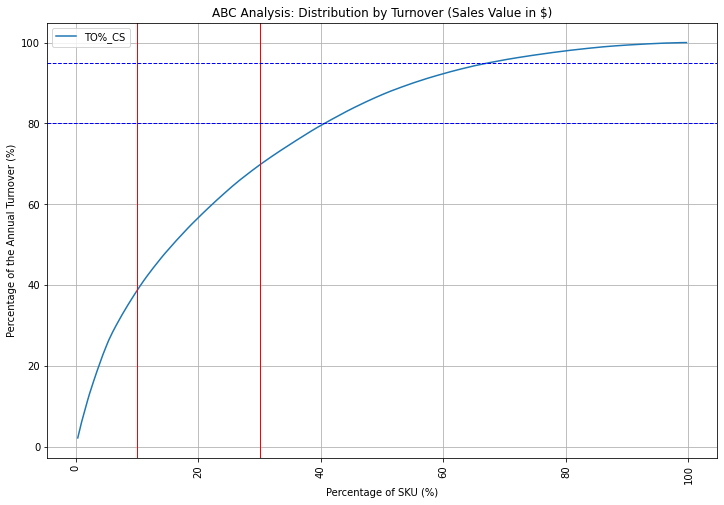

In [24]:
# Distribution by Value
ax = plt.gca()
df_abc.plot(figsize=(12, 8), x='SKU_%', y='TO%_CS', ax =ax, grid = True)
# ABC
# 20%, 50% of SKU Number
ax.axvline(10 , color="red", linestyle="-", linewidth = 1.0)
ax.axvline(30 , color="red", linestyle="-", linewidth = 1.0)
# 20%, 50% of SKU Number
ax.axhline(80 , color="blue", linestyle="--", linewidth = 1.0)
ax.axhline(95 , color="blue", linestyle="--", linewidth = 1.0)
plt.xlabel('Percentage of SKU (%)')
plt.xticks(rotation=90)
plt.ylabel('Percentage of the Annual Turnover (%)')
plt.title('ABC Analysis: Distribution by Turnover (Sales Value in $)')
plt.show()

### Segmentation by Demand Variability
| Coefficient of Variation = f(% TO)

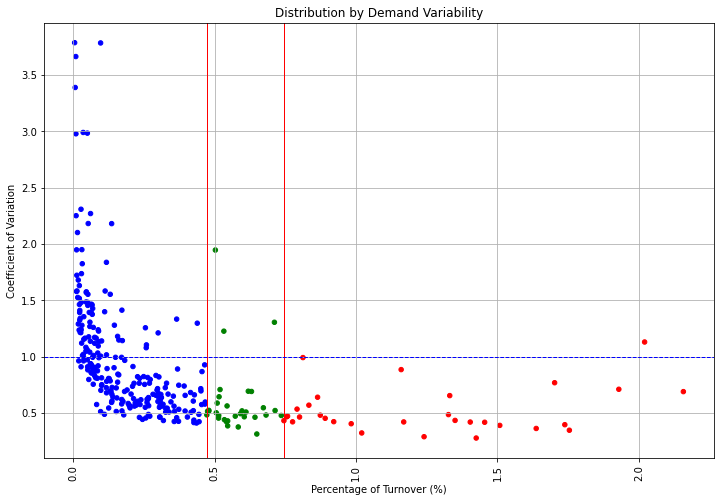

In [25]:
# Bar Chart
ax = plt.gca()
colors = {'A':'red', 'B':'green', 'C':'blue'}
# Remove Outliers
df_plot = df_abc[df_abc['CV']<4].copy()
df_plot.plot.scatter(figsize=(12, 8), x='TO%', y='CV', color=df_plot['ABC'].map(colors), ax =ax, grid = True)
# ABC
# A, B and C
ax.axvline(to_a , color="red", linestyle="-", linewidth = 1.0)
ax.axvline(to_b , color="red", linestyle="-", linewidth = 1.0)
# 20%, 50% of SKU Number
ax.axhline(1 , color="blue", linestyle="--", linewidth = 1.0)
plt.xlabel('Percentage of Turnover (%)')
plt.xticks(rotation=90)
plt.ylabel('Coefficient of Variation')
plt.title('Distribution by Demand Variability')
plt.show()

### Distribution for Important Products with high variability
| Example of product with High COV

<ipython-input-26-07572ddd5c2e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_dist = pd.DataFrame(df_dist.groupby(['item_id', 'dept_id', 'cat_id']).sum())


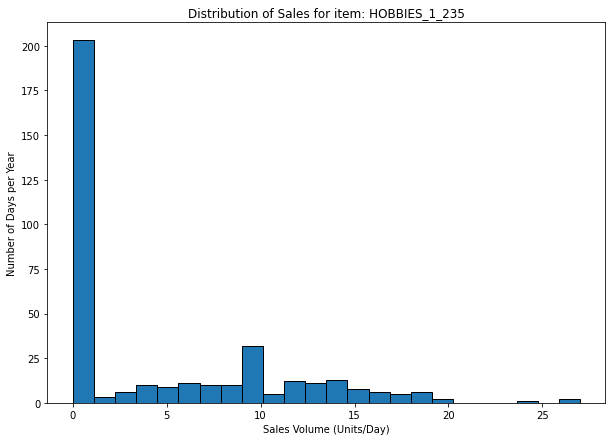

In [26]:
# ABC SKU-LEVEL
df_dist = df[df['cat_id']=='HOBBIES'].drop(['mean', 'std', 'CV'], axis = 1).copy()
df_dist = pd.DataFrame(df_dist.groupby(['item_id', 'dept_id', 'cat_id']).sum())
df_dist.reset_index(inplace = True)

# Item B
item_high = 'HOBBIES_1_235'            # item in B with high CV
df_dist = df_dist[df_dist['item_id']==item_high][COLS_DATE].T
df_dist.columns = ['Units']

# Simple histogram
df_dist['Units'].hist(figsize=(10,7), edgecolor='black', grid = False, bins = df_dist['Units'].nunique()) # , linewidth=1.2 , bins = 30
plt.xlabel('Sales Volume (Units/Day)')
plt.ylabel('Number of Days per Year')
plt.title('Distribution of Sales for item: {}'.format(item_high))
plt.show()

### Distribution for Important Products with low variability

In [27]:
df_abc[(df_abc['CV']<0.3) & (df_abc['TO%']>0.25)]

,item_id,dept_id,cat_id,units,TO,mean,std,CV,Normality_p,Not_Normal,TO%,TO%_CS,SKU_ID,SKU_%,ABC
9,HOBBIES_1_323,HOBBIES_1,HOBBIES,8270,40822.60,22.657534,6.291498,0.277678,0.021935,False,1.424885,17.325631,10.0,3.154574,A
14,HOBBIES_1_337,HOBBIES_1,HOBBIES,9685,35543.95,26.534247,7.677715,0.289351,0.003679,False,1.240638,23.978597,15.0,4.731861,A


<ipython-input-28-06a2590c16c4>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_dist = pd.DataFrame(df_dist.groupby(['item_id', 'dept_id', 'cat_id']).sum())


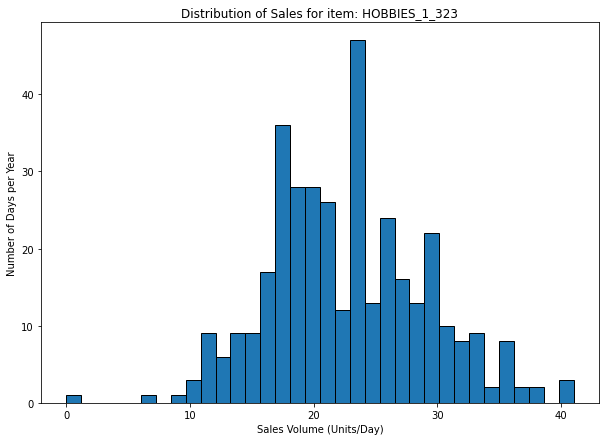

In [28]:
# ABC SKU-LEVEL
df_dist = df[df['cat_id']=='HOBBIES'].drop(['mean', 'std', 'CV'], axis = 1).copy()
df_dist = pd.DataFrame(df_dist.groupby(['item_id', 'dept_id', 'cat_id']).sum())
df_dist.reset_index(inplace = True)

# Item A
item_high = 'HOBBIES_1_323'    ## item in A with low CV
df_dist = df_dist[df_dist['item_id']==item_high][COLS_DATE].T
df_dist.columns = ['Units']

# Simple histogram
df_dist['Units'].hist(figsize=(10,7), edgecolor='black', grid = False, bins = df_dist['Units'].nunique()) # , linewidth=1.2 , bins = 30
plt.xlabel('Sales Volume (Units/Day)')
plt.ylabel('Number of Days per Year')
plt.title('Distribution of Sales for item: {}'.format(item_high))
plt.show()

### Distribution for Low rotation  Products with very high variability
| Example of item with very high COV (>2)

<ipython-input-29-daefcaeb0983>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_dist = pd.DataFrame(df_dist.groupby(['item_id', 'dept_id', 'cat_id']).sum())


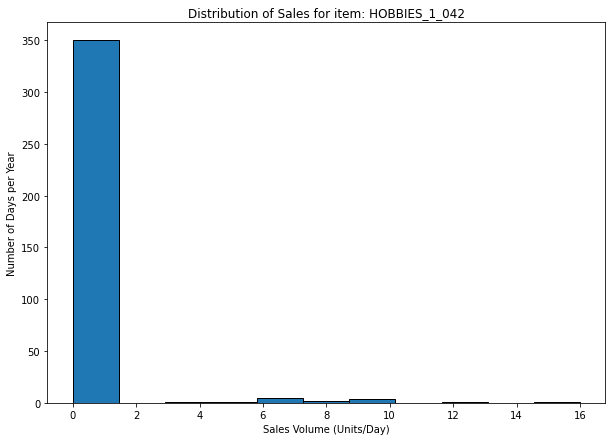

In [29]:
# ABC SKU-LEVEL
df_dist = df[df['cat_id']=='HOBBIES'].drop(['mean', 'std', 'CV'], axis = 1).copy()
df_dist = pd.DataFrame(df_dist.groupby(['item_id', 'dept_id', 'cat_id']).sum())
df_dist.reset_index(inplace = True)

# Item C
item_high = 'HOBBIES_1_042'       ## item in C with high CV
df_dist = df_dist[df_dist['item_id']==item_high][COLS_DATE].T
df_dist.columns = ['Units']

# Simple histogram
df_dist['Units'].hist(figsize=(10,7), edgecolor='black', grid = False, bins = df_dist['Units'].nunique()) # , linewidth=1.2 , bins = 30
plt.xlabel('Sales Volume (Units/Day)')
plt.ylabel('Number of Days per Year')
plt.title('Distribution of Sales for item: {}'.format(item_high))
plt.show()

### Normality Test
> Can assume that the distribution of sales follows a normal distribution?

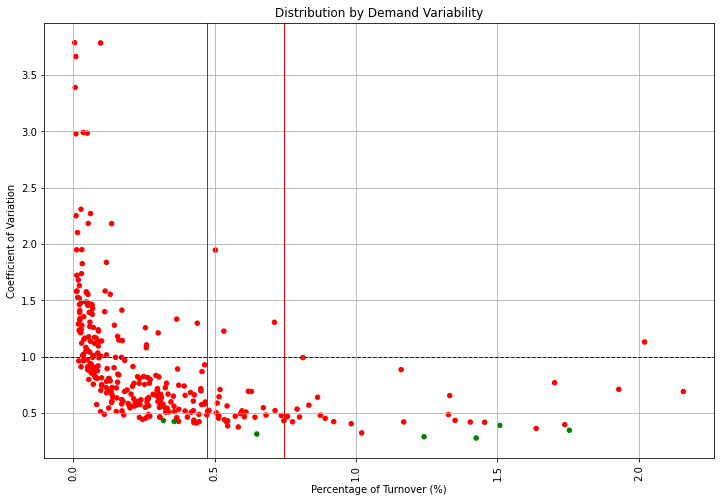

In [30]:
# Bar Chart
ax = plt.gca()
colors = {False:'green', True:'red'}
# Remove Outliers
df_plot = df_abc[df_abc['CV']<4].copy()
df_plot.plot.scatter(figsize=(12, 8), x='TO%', y='CV', color=df_plot['Not_Normal'].map(colors), ax =ax, grid = True)
# ABC
# A, B and C
ax.axvline(to_a , color="red", linestyle="-", linewidth = 1.0)
ax.axvline(to_b , color="red", linestyle="-", linewidth = 1.0)
# 20%, 50% of SKU Number
ax.axhline(1 , color="blue", linestyle="--", linewidth = 1.0)
plt.xlabel('Percentage of Turnover (%)')
plt.xticks(rotation=90)
plt.ylabel('Coefficient of Variation')
plt.title('Distribution by Demand Variability')
plt.show()